# Social Media Sentiments Analysis

## Table of Contents  <a id='back'></a> 
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Header Style](#header-style)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Data Usage and Formatting](#data-usage-and-formatting)
    - [Data Wrangling](#data-wrangling)
- [Data Analysis](#data-analysis)
    - [General User Demographics](#general-user-demographics)
        - [What are the user’s preferred social media platforms?](#what-are-the-users-preferred-social-media-platforms)
        - [Which countries contain the largest population of these users?](#which-countries-contain-the-largest-population-of-these-users)
        - [Do different countries have a preferred social media platform?](#do-different-countries-have-a-preferred-social-media-platform)
    - [User Activity](#user-activity)
        - [Do users prefer to like or reshare posts?](#do-users-prefer-to-like-or-reshare-posts)
        - [Do social media users engage differently on each platform?](#do-social-media-users-engage-differently-on-each-platform)
        - [Which hours are users most active?](#which-hours-are-users-most-active)
        - [Which season do users have the highest activity on social media?]()
        - [How has user engagement changed over time?]()
    - [User Sentiment](#user-sentiment)
        - [Is user post sentiment different on each platform?]()
        - [Does user sentiment affect the length of their text posts?]()
        - [Does user sentiment affect likes and shareability?]()
        - [Are there any anomalies in user sentiment throughout the day? Year?]()
        - [Is there a correlation between user sentiment and the country they reside in? ]()
- [Conclusion](#conclusion)

<a name='headers'>

## Project Introduction

In this analysis, I want to gauge social media user behavior and sentiment across various platforms to better understand social media users and how they interact on the platform. The Social Media Sentiments Analysis Dataset documents user interactions with one another through their posts, likes, and reshares across multiple social media platforms. This dataset is a snapshot of user-generated content consisting of text, sentiment, timestamps, usernames, platform used, hashtags, likes, reshares, and user country. 

### Analysis Outline

Within this exploratory data analysis, we are attempting to uncover new insights and unusual anomalies within the dataset in these key areas:

1.	General User Demographics

        a. What are the user’s preferred social media platforms?

        b. Which countries contain the largest population of these users?

        c. Do different countries have a preferred social media platform?

2.	User Activity

        a. Do users prefer to like or reshare posts?

        b. Do social media users engage differently on each platform?

        c. Which hours are users most active?

        d. Which season do users have the highest activity on social media?

        e. How has user engagement changed over time?

3.	User Sentiment

        a. Is user post sentiment different on each platform?

        b. Does user sentiment affect the length of their text posts?

        c. Does user sentiment affect likes and shareability?

        d. Are there any anomalies in user sentiment throughout the day? Year?

        e. Is there a correlation between user sentiment and the country they reside in? 


### Results

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from colour import Color

In [2]:
# Importing file for assignment
try:
    sm = pd.read_csv('sentimentdataset.csv')
except:
    sm = pd.read_csv('/datasets/sentimentdataset.csv')

[Back to Table of Contents](#back)

## Pre-Processing Data

### Header Style

In [3]:
# Getting general information about the dataset
sm.info()
sm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
#checking for snakecase format
sm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [5]:
# Renaming column names to snake_case format
sm = sm.rename(columns={'Unnamed: 0.1': 'unnamed_0.01',
                        'Unnamed: 0': 'unnamed_0',
                        'Text': 'text',
                        'Sentiment': 'sentiment',
                        'Timestamp': 'timestamp',
                        'User': 'user',
                        'Platform': 'platform',
                        'Hashtags': 'hashtags',
                        'Retweets': 'reshared',
                        'Likes': 'likes',
                        'Country': 'country',
                        'Year': 'year',
                        'Month': 'month',
                        'Day': 'day',
                        'Hour': 'hour'})
sm.columns

Index(['unnamed_0.01', 'unnamed_0', 'text', 'sentiment', 'timestamp', 'user',
       'platform', 'hashtags', 'reshared', 'likes', 'country', 'year', 'month',
       'day', 'hour'],
      dtype='object')

### Duplicates

In [6]:
# Checking for duplicates
sm.duplicated().sum()

0

### Missing Values

In [7]:
# Checking for null values
sm.isna().sum()

unnamed_0.01    0
unnamed_0       0
text            0
sentiment       0
timestamp       0
user            0
platform        0
hashtags        0
reshared        0
likes           0
country         0
year            0
month           0
day             0
hour            0
dtype: int64

### Data Usage and Formatting

In [8]:
sm.info()
sm.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed_0.01  732 non-null    int64  
 1   unnamed_0     732 non-null    int64  
 2   text          732 non-null    object 
 3   sentiment     732 non-null    object 
 4   timestamp     732 non-null    object 
 5   user          732 non-null    object 
 6   platform      732 non-null    object 
 7   hashtags      732 non-null    object 
 8   reshared      732 non-null    float64
 9   likes         732 non-null    float64
 10  country       732 non-null    object 
 11  year          732 non-null    int64  
 12  month         732 non-null    int64  
 13  day           732 non-null    int64  
 14  hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,unnamed_0.01,unnamed_0,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
390,391,395,Captivated by the ethereal beauty of a field f...,Enchantment,2022-08-10 22:00:00,NightSkyObserver,Instagram,#Enchantment #FireflyField,25.0,50.0,Brazil,2022,8,10,22


In [9]:
# Looking at both of the numeric unnamed columns, it appears to look like a column 
# that was accidentally recording the row value. If they are we can remove these columns.
sm['unnamed_0'].isin(sm['unnamed_0.01']).count()

732

In [10]:
# After uncovering that these two columns are identical to the row value, 
# they can be removed to optimize data usage
sm = sm.drop(columns=['unnamed_0.01', 'unnamed_0'])
sm.head()

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
# Checking the text column
sm['text'].head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: text, dtype: object

In [12]:
# Lowering the text column to snakecase format and removing spaces from the fron and end of the the text values
sm['text'] = sm['text'].str.lower()
sm['text'] = sm['text'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['text'] = sm['text'].apply(lambda x: x.replace(' ', '_'))
sm['text'].head()

0          enjoying_a_beautiful_day_at_the_park!
1             traffic_was_terrible_this_morning.
2            just_finished_an_amazing_workout!_💪
3    excited_about_the_upcoming_weekend_getaway!
4    trying_out_a_new_recipe_for_dinner_tonight.
Name: text, dtype: object

In [13]:
# Checking the sentiment column
sm['sentiment'].head()

0     Positive  
1     Negative  
2     Positive  
3     Positive  
4     Neutral   
Name: sentiment, dtype: object

In [14]:
# Lowering the elements to snakecase format, removing irregular spaces, and changing the data type to lower data usage
sm['sentiment'] = sm['sentiment'].str.lower()
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['sentiment'] = sm['sentiment'].apply(lambda x: x.replace(' ', '_'))
sm['sentiment'] = sm['sentiment'].astype('category')
sm['sentiment'].head()

0    positive
1    negative
2    positive
3    positive
4     neutral
Name: sentiment, dtype: category
Categories (191, object): ['acceptance', 'accomplishment', 'admiration', 'adoration', ..., 'wonder', 'wonderment', 'yearning', 'zest']

In [15]:
# Looking at the first few values it shows the time stamp column is a string type but
# we should convert it to a datetime type to save data usage
sm['timestamp'] = pd.to_datetime(sm['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [16]:
# Checking the user column
sm['user'].head()

0     User123      
1     CommuterX    
2     FitnessFan   
3     AdventureX   
4     ChefCook     
Name: user, dtype: object

In [17]:
# Lowering the user column to snakecase format and removing spaces that are not needed
sm['user'] = sm['user'].str.lower()
sm['user'] = sm['user'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['user'].head()

0       user123
1     commuterx
2    fitnessfan
3    adventurex
4      chefcook
Name: user, dtype: object

In [18]:
# Checking the platform column
sm['platform'].head()

0      Twitter  
1      Twitter  
2     Instagram 
3      Facebook 
4     Instagram 
Name: platform, dtype: object

In [19]:
# Lowering the platform column to snakecase format and fixing spacing typos
sm['platform'] = sm['platform'].str.lower()
sm['platform'] = sm['platform'].apply(lambda x: x.strip())
sm['platform'] = sm['platform'].astype('category')
sm['platform'].head()

0      twitter
1      twitter
2    instagram
3     facebook
4    instagram
Name: platform, dtype: category
Categories (3, object): ['facebook', 'instagram', 'twitter']

In [20]:
# Checking the hashtags column
sm['hashtags'].head()

0     #Nature #Park                            
1     #Traffic #Morning                        
2     #Fitness #Workout                        
3     #Travel #Adventure                       
4     #Cooking #Food                           
Name: hashtags, dtype: object

In [21]:
# Lowering the hashtags column to snakecase format and removing spaces that are not needed
sm['hashtags'] = sm['hashtags'].str.lower()
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['hashtags'] = sm['hashtags'].apply(lambda x: x.replace(' ', '_'))
sm['hashtags'].head()

0         #nature_#park
1     #traffic_#morning
2     #fitness_#workout
3    #travel_#adventure
4        #cooking_#food
Name: hashtags, dtype: object

In [22]:
# Checking the country column
sm['country'].head()

0       USA      
1       Canada   
2     USA        
3       UK       
4      Australia 
Name: country, dtype: object

In [23]:
# Lowering the country column to snakecase format and removing spaces
sm['country'] = sm['country'].str.lower()
sm['country'] = sm['country'].apply(lambda x: x.rstrip()).apply(lambda x: x.lstrip())
sm['country'] = sm['country'].apply(lambda x: x.replace(' ', '_'))
sm['country'] = sm['country'].astype('category')
sm['country'].head()

0          usa
1       canada
2          usa
3           uk
4    australia
Name: country, dtype: category
Categories (33, object): ['australia', 'austria', 'belgium', 'brazil', ..., 'switzerland', 'thailand', 'uk', 'usa']

In [24]:
sm.info()
sm.head()
# Memory usage has decreased from 85.9kb to 67.2kb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   text       732 non-null    object        
 1   sentiment  732 non-null    category      
 2   timestamp  732 non-null    datetime64[ns]
 3   user       732 non-null    object        
 4   platform   732 non-null    category      
 5   hashtags   732 non-null    object        
 6   reshared   732 non-null    float64       
 7   likes      732 non-null    float64       
 8   country    732 non-null    category      
 9   year       732 non-null    int64         
 10  month      732 non-null    int64         
 11  day        732 non-null    int64         
 12  hour       732 non-null    int64         
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 67.2+ KB


,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,#nature_#park,15.0,30.0,usa,2023,1,15,12
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,#traffic_#morning,5.0,10.0,canada,2023,1,15,8
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,#fitness_#workout,20.0,40.0,usa,2023,1,15,15
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,#travel_#adventure,8.0,15.0,uk,2023,1,15,18
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,#cooking_#food,12.0,25.0,australia,2023,1,15,19


[Back to Table of Contents](#back)

### Data Wrangling

In [25]:
# Looking at the hashtags column, it would be more convenient to split the hashtags so that each cell only has one unique hashtag to make filtering easier in the future
sm.head(10)

,text,sentiment,timestamp,user,platform,hashtags,reshared,likes,country,year,month,day,hour
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,#nature_#park,15.0,30.0,usa,2023,1,15,12
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,#traffic_#morning,5.0,10.0,canada,2023,1,15,8
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,#fitness_#workout,20.0,40.0,usa,2023,1,15,15
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,#travel_#adventure,8.0,15.0,uk,2023,1,15,18
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,#cooking_#food,12.0,25.0,australia,2023,1,15,19
5,feeling_grateful_for_the_little_things_in_life.,positive,2023-01-16 09:10:00,gratitudenow,twitter,#gratitude_#positivevibes,25.0,50.0,india,2023,1,16,9
6,rainy_days_call_for_cozy_blankets_and_hot_cocoa.,positive,2023-01-16 14:45:00,rainydays,facebook,#rainydays_#cozy,10.0,20.0,canada,2023,1,16,14
7,the_new_movie_release_is_a_must-watch!,positive,2023-01-16 19:30:00,moviebuff,instagram,#movienight_#mustwatch,15.0,30.0,usa,2023,1,16,19
8,political_discussions_heating_up_on_the_timeline.,negative,2023-01-17 08:00:00,debatetalk,twitter,#politics_#debate,30.0,60.0,usa,2023,1,17,8
9,missing_summer_vibes_and_beach_days.,neutral,2023-01-17 12:20:00,beachlover,facebook,#summer_#beachdays,18.0,35.0,australia,2023,1,17,12


In [26]:
# Splitting the hashtags into two columns
new_hashtag = sm['hashtags'].str.split('_', n=1, expand=True)

# Creating new columns for the newly split hashtags
sm['first_hashtag'] = new_hashtag[0]
sm['second_hashtag'] = new_hashtag[1]

# Removing the old hashtags column
sm.drop(columns=['hashtags'], inplace=True)

# Removing the '#' symbol
sm['first_hashtag'] = sm['first_hashtag'].apply(lambda x: x.replace('#', ''))
sm['second_hashtag'] = sm['second_hashtag'].apply(lambda x: x.replace('#', ''))

sm.head()

,text,sentiment,timestamp,user,platform,reshared,likes,country,year,month,day,hour,first_hashtag,second_hashtag
0,enjoying_a_beautiful_day_at_the_park!,positive,2023-01-15 12:30:00,user123,twitter,15.0,30.0,usa,2023,1,15,12,nature,park
1,traffic_was_terrible_this_morning.,negative,2023-01-15 08:45:00,commuterx,twitter,5.0,10.0,canada,2023,1,15,8,traffic,morning
2,just_finished_an_amazing_workout!_💪,positive,2023-01-15 15:45:00,fitnessfan,instagram,20.0,40.0,usa,2023,1,15,15,fitness,workout
3,excited_about_the_upcoming_weekend_getaway!,positive,2023-01-15 18:20:00,adventurex,facebook,8.0,15.0,uk,2023,1,15,18,travel,adventure
4,trying_out_a_new_recipe_for_dinner_tonight.,neutral,2023-01-15 19:55:00,chefcook,instagram,12.0,25.0,australia,2023,1,15,19,cooking,food


In [27]:
# Looking at the sentiment column there are a lot of unique values that tell a similar story. 
# pd.set_option('display.max_rows', None)
sm['sentiment'].value_counts()

positive        45
joy             44
excitement      37
contentment     19
gratitude       18
                ..
energy           1
engagement       1
heartache        1
breakthrough     1
playfuljoy       1
Name: sentiment, Length: 191, dtype: int64

In [28]:
# For this analysis, we are going to reduce the number of values in the sentiment column to positive, neutral, 
# and negative to make it easier to read and filter since many of these values are expressing a form of both feelings.
sm['sentiment'] = sm['sentiment'].replace(['joy',
                                           'excitement',
                                           'contentment',
                                           'gratitude',
                                           'curiosity',
                                           'serenity',
                                           'happy',
                                           'nostalgia',
                                           'awe',
                                           'hopeful',
                                           'euphoria',
                                           'enthusiasm',
                                           'pride',
                                           'elation',
                                           'determination',
                                           'inspiration',
                                           'playful',
                                           'surprise',
                                           'happiness',
                                           'inspired',
                                           'hope',
                                           'empowerment',
                                           'admiration',
                                           'compassionate',
                                           'compassion',
                                           'proud',
                                           'calmness',
                                           'reverence',
                                           'fulfillment',
                                           'tenderness',
                                           'arousal',
                                           'enchantment',
                                           'grateful',
                                           'thrill',
                                           'confident',
                                           'kind',
                                           'creativity',
                                           'accomplishment',
                                           'harmony',
                                           'free-spirited',
                                           'empathetic',
                                           'satisfaction',
                                           'amusement',
                                           'adventure',
                                           'love',
                                           'enjoyment',
                                           'exploration',
                                           'adoration',
                                           'zest',
                                           'affection',
                                           'radiance',
                                           'rejuvenation',
                                           'resilience',
                                           'coziness',
                                           'whimsy',
                                           'captivation',
                                           'tranquility',
                                           'positivity',
                                           'playfuljoy',
                                           'overjoyed',
                                           'optimism',
                                           'ocean\'s_freedom',
                                           'nature\'s_beauty',
                                           'relief',
                                           'motivation',
                                           'amazement',
                                           'mindfulness',
                                           'mesmerizing',
                                           'melodic',
                                           'marvel',
                                           'kindness',
                                           'joyfulreunion',
                                           'joy_in_baking',
                                           'intrigue',
                                           'appreciation',
                                           'grandeur',
                                           'artisticburst',
                                           'iconic',
                                           'imagination',
                                           'renewed_effort',
                                           'runway_creativity',
                                           'freedom',
                                           'friendship',
                                           'heartwarming',
                                           'success',
                                           'blessed',
                                           'engagement',
                                           'festivejoy',
                                           'thrilling_journey',
                                           'touched',
                                           'triumph',
                                           'vibrancy',
                                           'winter_magic',
                                           'breakthrough',
                                           'celebration ',
                                           'energy',
                                           'elegance',
                                           'ecstasy',
                                           'dreamchaser',
                                           'dazzle',
                                           'culinaryodyssey',
                                           'culinary_adventure',
                                           'creative_inspiration',
                                           'confidence',
                                           'colorful',
                                           'charm',
                                           'celebration',
                                           'celestial_wonder',
                                           'wonderment'
                                           ], 'positive')

sm['sentiment'] = sm['sentiment'].replace(['acceptance',
                                           'indifference',
                                           'ambivalence',
                                           'reflection',
                                           'anticipation',
                                           'wonder',
                                           'emotion',
                                           'contemplation',
                                           'intimidation',
                                           'adrenaline',
                                           'journey',
                                           'innerjourney',
                                           'hypnotic',
                                           'immersion',
                                           'romance',
                                           'bittersweet',
                                           'solitude',
                                           'spark',
                                           'suspense',
                                           'envisioning_history',
                                           'sympathy',
                                           'emotionalstorm',
                                           'whispers_of_the_past',
                                           'darkness',
                                           'connection',
                                           'challenge',
                                           'obstacle',
                                           ], 'neutral')

sm['sentiment'] = sm['sentiment'].replace(['despair',
                                           'sad',
                                           'grief',
                                           'loneliness',
                                           'embarrassed',
                                           'confusion',
                                           'melancholy',
                                           'numbness',
                                           'frustration',
                                           'regret',
                                           'hate',
                                           'bad',
                                           'disgust',
                                           'betrayal',
                                           'bitterness',
                                           'frustrated',
                                           'desolation',
                                           'boredom',
                                           'overwhelmed',
                                           'jealousy',
                                           'jealous',
                                           'heartbreak',
                                           'dismissive',
                                           'fearful',
                                           'envious',
                                           'resentment',
                                           'bitter',
                                           'shame',
                                           'devastated',
                                           'envy',
                                           'loss',
                                           'fear',
                                           'helplessness',
                                           'isolation',
                                           'mischievous',
                                           'disappointed',
                                           'sadness',
                                           'sorrow',
                                           'disappointment',
                                           'anxiety',
                                           'apprehensive',
                                           'yearning',
                                           'anger',
                                           'pensive',
                                           'miscalculation',
                                           'lostlove',
                                           'pressure',
                                           'solace',
                                           'ruins',
                                           'exhaustion',
                                           'heartache',
                                           'suffering',
                                           'desperation'
                                           ], 'negative')

sm['sentiment'].value_counts()

positive    466
negative    194
neutral      72
Name: sentiment, dtype: int64

In [29]:
# To make the text column more usable we can change the column into a count of the number of
# characters in each text. Since we have the sentiment column, we can get an idea of what type 
# of emotion was expressed in the text and the character length will show the intensity of that feeling
sm['text_len'] = sm['text'].str.len()
sm.drop(columns=['text'], inplace=True)

sm.head()

,sentiment,timestamp,user,platform,reshared,likes,country,year,month,day,hour,first_hashtag,second_hashtag,text_len
0,positive,2023-01-15 12:30:00,user123,twitter,15.0,30.0,usa,2023,1,15,12,nature,park,37
1,negative,2023-01-15 08:45:00,commuterx,twitter,5.0,10.0,canada,2023,1,15,8,traffic,morning,34
2,positive,2023-01-15 15:45:00,fitnessfan,instagram,20.0,40.0,usa,2023,1,15,15,fitness,workout,35
3,positive,2023-01-15 18:20:00,adventurex,facebook,8.0,15.0,uk,2023,1,15,18,travel,adventure,43
4,neutral,2023-01-15 19:55:00,chefcook,instagram,12.0,25.0,australia,2023,1,15,19,cooking,food,43


[Back to Table of Contents](#back)

## Data Analysis

### General User Demographics

#### What are the user’s preferred social media platforms?

In [30]:
# Sorting out the number of unique users
sorted = sm.sort_values(['user'], ascending=True)
unique_users = sorted.groupby('user').first().reset_index()

print(unique_users['user'].nunique())
print(sm['user'].nunique())

670
670


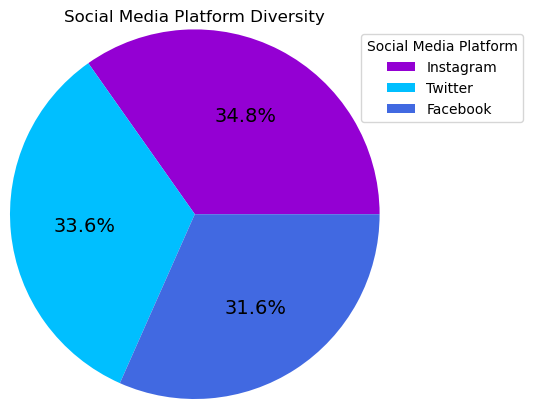

In [31]:
unique_users['platform'].value_counts().plot(kind='pie',
                                             autopct='%1.1f%%',
                                             fontsize=14,
                                             labels=['', '', ''],
                                             colors=['darkviolet', 'deepskyblue', 'royalblue'],
                                             radius=1.25)

plt.title('Social Media Platform Diversity')
plt.legend(['Instagram', 'Twitter', 'Facebook'],
           title='Social Media Platform',
           loc=[0.95,.75])
plt. ylabel('') 
plt.show()
# According to the data, it shows that users prefer to use Instagram over Twitter and Facebook by a minor margin, however, all three social media platforms have a similar amount of users

[Back to Table of Contents](#back)

#### Which countries contain the largest population of these users?

In [32]:
# Finding the distribution of social media users across all participating countries
sm.groupby(['country']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False)

# Looking at the distribution of users across all countries, we have uncovered that the total number of users 
# is heavily skewed toward the top 10 countries. Most of these countries are first-world countries alongside a 
# few developing countries that have increased access to the internet. 

,user
country,
usa,179
uk,139
canada,129
australia,69
india,67
brazil,16
france,16
japan,15
germany,14


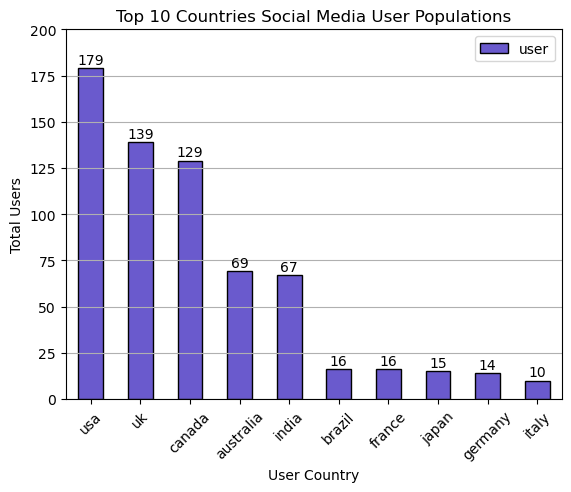

In [33]:
top_10_size = sm.groupby(['country']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False).head(10).plot(kind='bar',
                                                                                                                     color='slateblue',
                                                                                                                     edgecolor='black')

for rect in top_10_size.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    top_10_size.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.title('Top 10 Countries Social Media User Populations')
plt.xlabel('User Country')
plt.xticks(rotation=45)
plt.ylabel('Total Users')
plt.ylim([0, 200])
plt.grid(axis='y')
plt.show()

# Even within the top 20 largest social media markets, user distribution is heavily concentrated within the top 5 countries

[Back to Table of Contents](#back)

#### Do different countries have a preferred social media platform?

In [34]:
# Created a function to find the number of users from each country and platform to eventually make a stacked bar graph to show user platforms within each country
def user_count(country):
    return sm[(sm['country'] == country)].groupby(['country', 'platform']).agg({'user': 'nunique'}).sort_values(by='user', ascending=False).head(3).apply(list).reset_index()

usa_count = user_count('usa')
uk_count = user_count('uk')
canada_count = user_count('canada')
australia_count = user_count('australia')
india_count = user_count('india')
brazil_count = user_count('brazil')
france_count = user_count('france')
japan_count = user_count('japan')
germany_count = user_count('germany')
italy_count = user_count('italy')

# Using concat to create a new dataframe with the total number of users that use each platform from the top 10 countries with the largest user base
country_user_count = pd.concat([usa_count, uk_count, canada_count, australia_count, india_count, brazil_count, france_count, japan_count, germany_count, italy_count], ignore_index = True)

In [35]:
# Creating a new function to retrieve only the numeric value of the total users from the given country and platform
def platform_count(country, platform):
    return country_user_count[(country_user_count['country'] == country) & (country_user_count['platform'] == platform)].select_dtypes(int).values

# Creating a new dataframe to make a stacked bar graph of total users and their prefered plaform
top_10_countries = pd.DataFrame([
    ['usa', platform_count('usa', 'twitter'), platform_count('usa', 'instagram'), platform_count('usa', 'facebook')],
    ['uk', platform_count('uk', 'twitter'), platform_count('uk', 'instagram'), platform_count('uk', 'facebook')],
    ['canada', platform_count('canada', 'twitter'), platform_count('canada', 'instagram'), platform_count('canada', 'facebook')],
    ['australia', platform_count('australia', 'twitter'), platform_count('australia', 'instagram'), platform_count('australia', 'facebook')],
    ['india', platform_count('india', 'twitter'), platform_count('india', 'instagram'), platform_count('india', 'facebook')],
    ['brazil',platform_count('brazil', 'twitter'), platform_count('brazil', 'instagram'), platform_count('brazil', 'facebook')],
    ['france', platform_count('france', 'twitter'), platform_count('france', 'instagram'), platform_count('france', 'facebook')],
    ['japan', platform_count('japan', 'twitter'), platform_count('japan', 'instagram'), platform_count('japan', 'facebook')],
    ['germany', platform_count('germany', 'twitter'), platform_count('germany', 'instagram'), platform_count('germany', 'facebook')],
    ['italy', platform_count('italy', 'twitter'), platform_count('italy', 'instagram'), platform_count('italy', 'facebook')]],
    columns=['country', 'twitter', 'instagram', 'facebook'])

print(top_10_countries)
top_10_countries.info()

     country twitter instagram facebook
0        usa  [[54]]    [[68]]   [[58]]
1         uk  [[47]]    [[51]]   [[41]]
2     canada  [[46]]    [[42]]   [[43]]
3  australia  [[21]]    [[26]]   [[23]]
4      india  [[29]]    [[19]]   [[20]]
5     brazil   [[5]]     [[5]]    [[6]]
6     france   [[9]]     [[5]]    [[2]]
7      japan   [[4]]     [[5]]    [[6]]
8    germany   [[4]]     [[3]]    [[7]]
9      italy   [[4]]     [[2]]    [[4]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     object
 2   instagram  10 non-null     object
 3   facebook   10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


In [36]:
# Converting data values to the right data type
top_10_countries['twitter'] = top_10_countries['twitter'].astype('int')
top_10_countries['instagram'] = top_10_countries['instagram'].astype('int')
top_10_countries['facebook'] = top_10_countries['facebook'].astype('int')

top_10_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    10 non-null     object
 1   twitter    10 non-null     int32 
 2   instagram  10 non-null     int32 
 3   facebook   10 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 328.0+ bytes


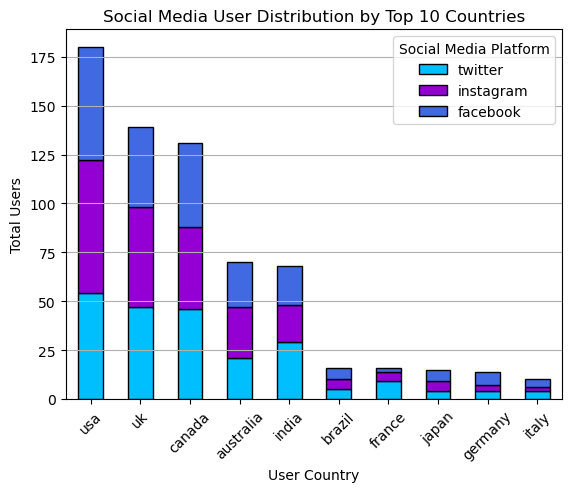

In [37]:
# Creating a stacked bar chart to show the platform diversity between the top 10 largest social media markets
top_10_countries.plot(x='country',
                      kind='bar',
                      stacked=True,
                      color=['deepskyblue', 'darkviolet', 'royalblue'],
                      edgecolor='black')

plt.title('Social Media User Distribution by Top 10 Countries')
plt.xlabel('User Country')
plt.xticks(rotation=45)
plt.ylabel('Total Users')
plt.legend(title='Social Media Platform')
plt.grid(axis='y')
plt.show()

# Within the top 10 social media markets, only India and France have a minor preference for Twitter,
# Australia and Japan for Instagram, and Germany for Facebook. Still, most users are equally split across all three social media platforms

[Back to Table of Contents](#back)

### User Activity

#### Do users prefer to like or reshare posts?

In [38]:
# Creating a new dataframe with total users, likes, and reshares to later calculate the average like and reshare per post
user_totals = sm.groupby('platform').agg({'user': 'nunique',
                                          'likes': 'sum',
                                          'reshared': 'sum'})

# Dividing the total number of likes and reshares by the total number of unique users to find the average number of likes and reshares per post
user_totals['likes_per_user'] = (user_totals['likes'] / user_totals['user']).round(1)
user_totals['reshares_per_user'] = (user_totals['reshared'] / user_totals['user']).round(1)

# Removing the total number of users, likes, and reshares to keep only the calculated averages
user_totals.drop(columns=['user', 'likes', 'reshared'], inplace=True)
user_totals

,likes_per_user,reshares_per_user
platform,,
facebook,44.6,22.3
instagram,48.5,24.3
twitter,43.5,21.8


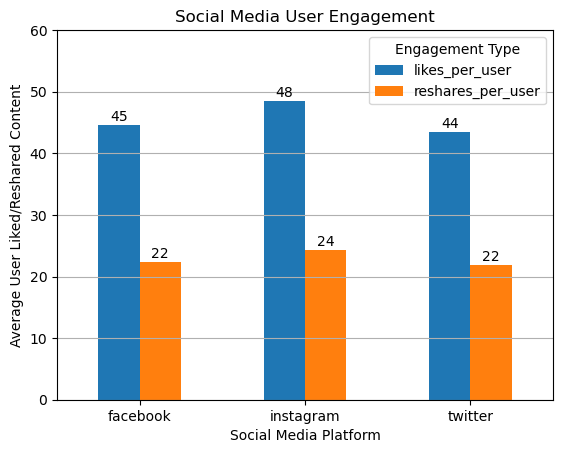

In [39]:
utp = user_totals.plot(kind='bar')

for rect in utp.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    utp.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.title('Social Media User Engagement')
plt.xlabel('Social Media Platform')
plt.xticks(rotation=360)
plt.ylabel('Average User Liked/Reshared Content')
plt.ylim([0, 60])

plt.legend(title='Engagement Type')
plt.grid(axis='y')
plt.show()

# Based on the average number of likes and reshares per post, users are more inclined to like posts twice as 
# likely as they are to reshare the post. This could also signal that reshares are more valuable than likes due 
# to their scarcity compared to likes. If a post has an above-average number of reshares within a short period, 
# then it could be a strong indicator to be recommended on the public or trending page.

[Back to Table of Contents](#back)

#### Do social media users engage differently on each platform?

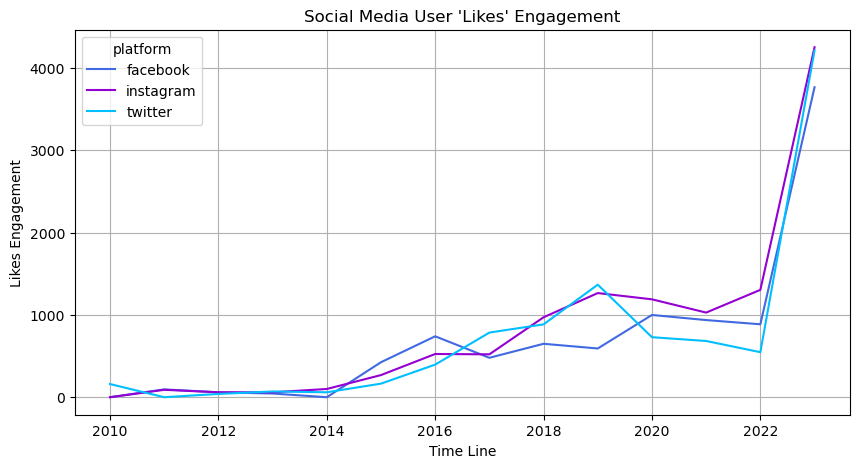

In [40]:
sm.pivot_table(index='year',
               columns='platform',
               values='likes',
               aggfunc='sum').plot(title='Social Media User \'Likes\' Engagement',
                                      xlabel='Time Line',
                                      ylabel='Likes Engagement',
                                      color=['royalblue', 'darkviolet', 'deepskyblue'],
                                      figsize=[10,5])
plt.grid()
plt.show()

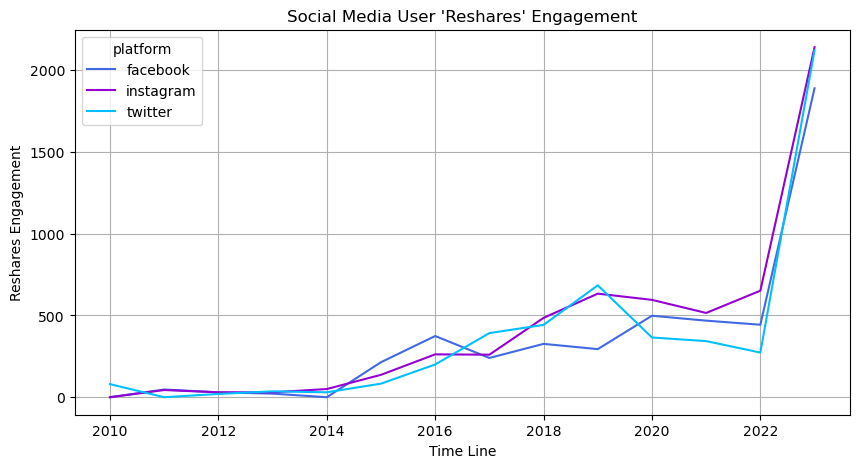

In [41]:
sm.pivot_table(index='year',
               columns='platform',
               values='reshared',
               aggfunc='sum').plot(title='Social Media User \'Reshares\' Engagement',
                                      xlabel='Time Line',
                                      ylabel='Reshares Engagement',
                                      color=['royalblue', 'darkviolet', 'deepskyblue'],
                                      figsize=[10,5])
plt.grid()
plt.show()

# Based on the total number of annual likes and reshares, vividly shows that the number of likes and reshares 
# are heavily correlated across all platforms. Overall, engagement is roughly at a similar level from 2010 to 2023 
# with each social media platform taking the lead in total engagement for about a year before minorly being overtaken for a year. 

#### Which hours are users most active?

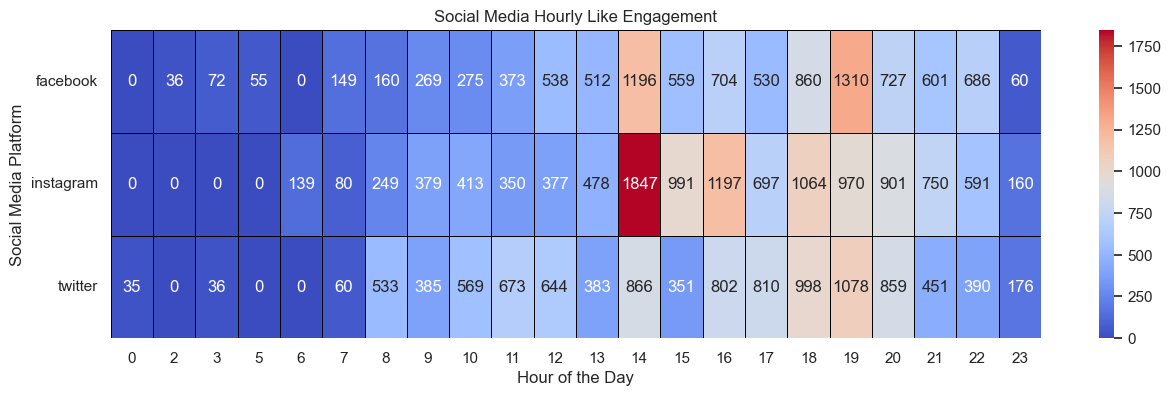

In [49]:
likes_pivot_hourly = sm.pivot_table(index='platform',
                                    columns='hour',
                                    values='likes',
                                    aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 4))
sns.heatmap(likes_pivot_hourly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Hourly Like Engagement')
plt.xlabel('Hour of the Day')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

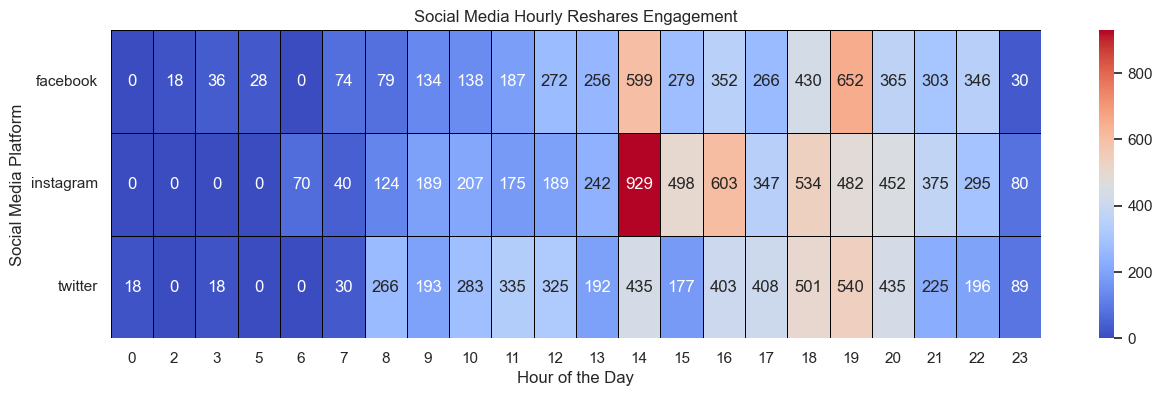

In [50]:
reshares_pivot_hourly = sm.pivot_table(index='platform',
                                       columns='hour',
                                       values='reshared',
                                       aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(15, 4))
sns.heatmap(reshares_pivot_hourly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Hourly Reshares Engagement')
plt.xlabel('Hour of the Day')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

[Back to Table of Contents](#back)

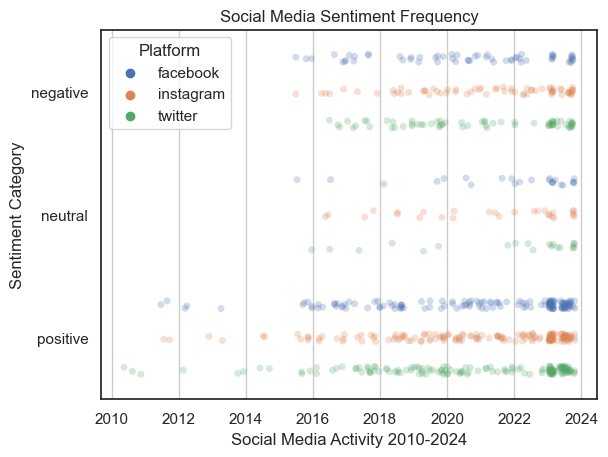

In [44]:
sns.stripplot(data=sm,
              x='timestamp',
              y='sentiment',
              hue='platform',
              dodge=True,
              alpha=.25,
              zorder=1)

plt.title('Social Media Sentiment Frequency')
plt.xlabel('Social Media Activity 2010-2024')
plt.ylabel('Sentiment Category')
plt.legend(title='Platform')
plt.grid(axis='x')
plt.show()

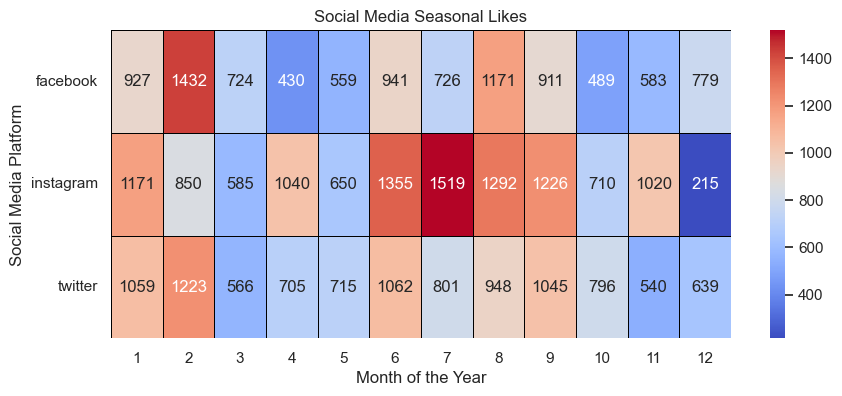

In [45]:
likes_pivot_monthly = sm.pivot_table(index='platform',
                                     columns='month',
                                     values='likes',
                                     aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
sns.heatmap(likes_pivot_monthly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Seasonal Likes')
plt.xlabel('Month of the Year')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

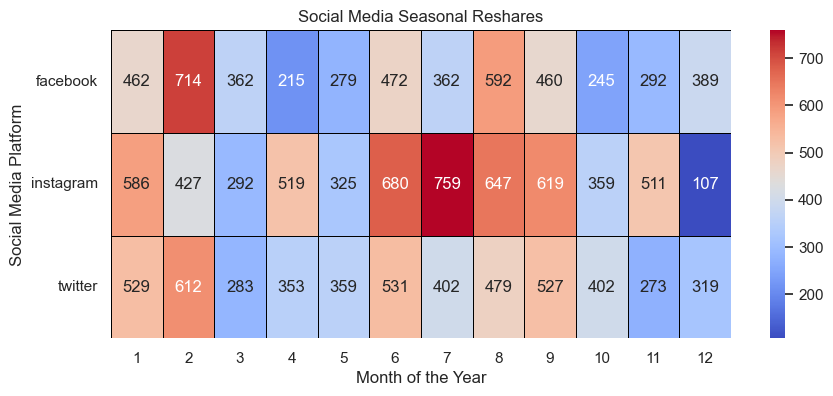

In [46]:
reshared_pivot_monthly = sm.pivot_table(index='platform',
                                        columns='month',
                                        values='reshared',
                                        aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(10, 4))
sns.heatmap(reshared_pivot_monthly,
            cmap='coolwarm',
            annot=True,
            fmt='g',
            linewidths=.5,
            linecolor='black')

plt.title('Social Media Seasonal Reshares')
plt.xlabel('Month of the Year')
plt.ylabel('Social Media Platform')
plt.yticks(rotation=360)
plt.show()

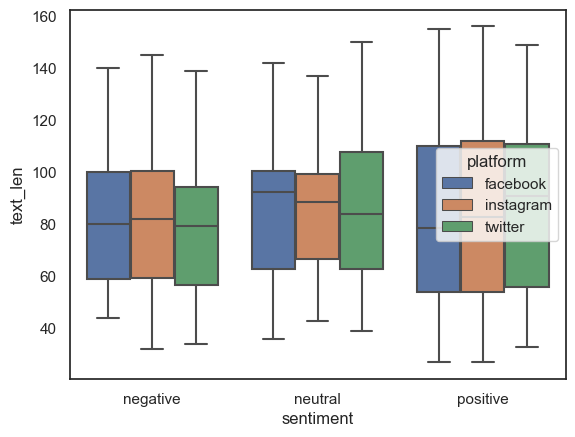

In [47]:
sns.boxplot(data=sm, x='sentiment', y='text_len',
            hue='platform')
plt.show()

In [48]:
sm.groupby('sentiment').agg({})

ValueError: No objects to concatenate

In [ ]:
sm.groupby('platform').agg({'likes': 'sum',
                            'reshared': 'sum'}).plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

[Back to Table of Contents](#back)

### User Sentiment

[Back to Table of Contents](#back)

## Conclusion

[Back to Table of Contents](#back)